<a href="https://colab.research.google.com/github/pravin2072/Bike_Sharing_Demand_Prediction_Capstone_Project_/blob/main/Company_bankruptcy_rediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing Libraries**

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings("ignore")

# **2. Loading the dataset**

In [35]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/COMPANY BANKRUPTCY PREDICTION.csv' 
df=pd.read_csv(path)

# **3. Exploratory Data Analysis**

In [44]:
shape = df.shape
print("The dataframe has {} rows and {} columns".format(shape[0], shape[1]))

The dataframe has 6819 rows and 96 columns


In [45]:
#printing the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [46]:
#checking for duplicacy in the dataset
df.duplicated().sum()

0

**The dataset doesn't contain any duplicate rows**

In [41]:
df.isnull().sum().sort_values(ascending=False).head()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
dtype: int64

**Since there are no missing values, we can jump into analyzing the data**

<Axes: xlabel='Bankrupt?', ylabel='count'>

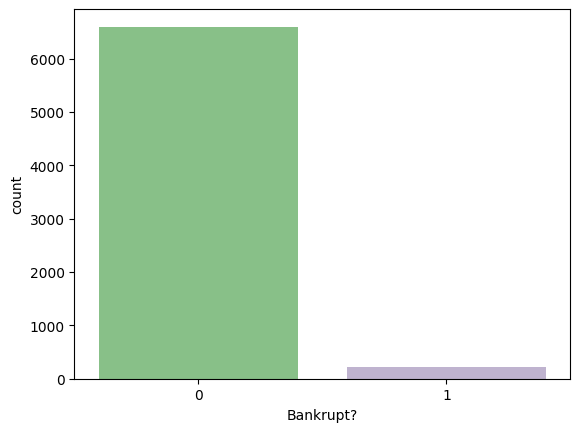

In [50]:
#finding number of bankrupt companies
sns.countplot(x='Bankrupt?', data=df, palette='Accent')


The records are observed to be highly imbalanced. Thus it is necessary to consider balancing the dataset through "Upsampling or Downsampling" techniques.

Through df.info(), we observed that we have a majority of "float64" data. The categorical data is distinguished as binary 1 and 0, thus stored as "int64". We separate the numeric and categoric data to analyze our dataset.



In [51]:
numeric_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index

df[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

**There are only three categorical data columns, we will first explore these columns**

In [57]:
#Plotting count of liability-assets flag
print(df['LiabilityAssetsFlag'].value_counts())

KeyError: ignored